<a href="https://colab.research.google.com/github/deaangelg/inmersion_datos_aula2/blob/main/INMERSION_DE_DATOS_AULA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv')

In [4]:
inmuebles.info()
#aqui conocemos la info de nuestras columnas , tipos de datos, nombre y numero de contenidos no nullos. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [8]:
type(inmuebles.Valor[0])
#leemos que tipo de dato es la columna de Valor

str

In [7]:
inmuebles.Valor[0]+inmuebles.Valor[1]+inmuebles.Valor[:5]
#debido a que el contenido de los valores son tipo cadena, si tratamos de sumar valores asi, sin mas, solo estaremos conctenando. 

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

In [9]:
inmuebles.Valor[0].split()
#split es una comando para separar una cadena en base a algun parametro, como en este ejemplo no hemos dado parametros, por default me toma el espacio
#de esta forma obtenemos nos regresa una lista (tipo panda series) con dos elementos, el caracter de dinero y el valor numerico. 

['$', '360.000.000']

In [20]:
valor = inmuebles.Valor.str.split(expand=True)
#aqui separamos el string de valor y lo convertimos en un nuevo data base. 
inmuebles["Moneda"] = valor [0]
#aqui hemos creado una nueva columna con el nombre de Moneda, esta columna es la que hemos creado en la linea anterior al separar el string
inmuebles["Precio"] = valor [1]
#aqui hemos creado una nueva columna con el nombre de Precio para el numero, esta columna es la que hemos creado en la linea anterior al separar el string
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio
2602,Casa,Casa en venta en Zona Noroccidental,4,5,260,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.350.000.000,$,1.350.000.000
1770,Apartamento,Apartamento en venta en Engativa,3,2,75,Engativa,Engativá,$ 409.365.000,$,409.365.000
3264,Apartamento,Apartamento en venta en San Patricio,2,2,75,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 526.000.000,$,526.000.000


In [21]:
inmuebles.info()
#aqui verificamos que el tipo de dato en la columna 8,9 (moneda y precio) sigue siendo un objeto (string) pero ya separados. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [24]:
inmuebles['Precio']=inmuebles ['Precio'].str.replace('.','',regex=True)
#hemos eliminado el caracter ". ", sustituyendo el punto por un vacio. Sin embargo sigue siendo u  objeto. 
inmuebles [['Precio', 'Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [27]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
#hemos creado una nueva columna llamada precio millon con el contenido de la columna Precio pero pasando los datos a tipo floatin
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Baños          9520 non-null   int64  
 4   Área           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [28]:
inmuebles.describe()
#Nos describe las columansd e hab, balos, area y precio milon (aquellas columnas numericos), con el coteo de datos en esas columnas,
#con la mediana, el estandar, el minimo, el primer cuartil, segundo, tercer y el maximo.


,Habitaciones,Baños,Área,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [31]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()
#mostramos de nuevo los datos de estas columnas pero utilizamos la preciosion de punto flotante con dos decimales.

,Habitaciones,Baños,Área,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [32]:
inmuebles.loc[inmuebles.Habitaciones==110]
#localizamos con .loc la fila que cumpla con  los parametros indicados en este caso aquella donde existan 110 habitaciones
#aqui encontramos un error, debido a que el area es de 110 metros no es posible que existan 110 habitaciones en una casa, por lo que debe ser un error de tipeo. 

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


<Axes: ylabel='Frequency'>

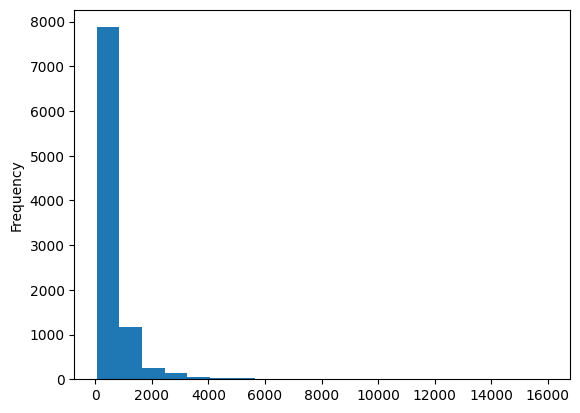

In [35]:
inmuebles['Precio_Millon'].plot.hist(bins=20)
#aqui graficamos la frecuencia de un precio con un histrograma, los bins son la separacion horizontal entre valores.4
#debido a que vemos que no se visualiza bien los datos bien, el histograma no es lo mas adecuado. 


Debido a que pandas no nos deja visualizar daros de la forma con conveniente vamos a instalar otras librerias especiales para visualizacion de datos. Pandas la utilizaremos para tratamiento de la base de daros. 

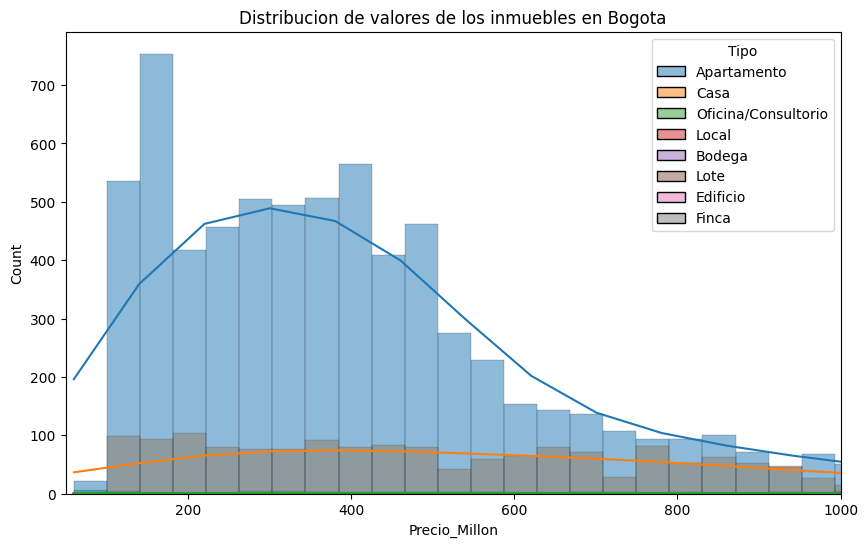

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
#improtamos las librerias especiales para visualizacion de datos
plt.figure(figsize=(10,6))
#establecemos un tamaño de nuestro grafico, horizontal por vertical
grafica=sns.histplot(data=inmuebles,x='Precio_Millon', kde=True, hue='Tipo')
#creamos el histograma con los valores de precio_millon
#kde mostramos la curva de densidad del comportamiendo del histograma
#con hue mostramos en el grafico el tipo de inmueble 
grafica.set_title ('Distribucion de valores de los inmuebles en Bogota')
plt.xlim((50,1000))
#limitamos nuestro grafico entr 50 y 20000, que son los valores minimos del  precio por millon y el un limite razonable para mostrar datos.
plt.savefig('/content/drive/MyDrive/inmersion_datos/inmersion_datos_imagen.png', format='png')
plt.show()
#mostramos el histograma

### **Desafíos**

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.